<a href="https://colab.research.google.com/github/abhisheksaxena1998/Emotion-detection-from-video/blob/master/Emotion_Detection_tomandjerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64
sz = 480
PATH = '/content/drive/My Drive/Colab Notebooks/Training'

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  5 classes:
 ['angry', 'happy', 'sad', 'Unknown', 'surprised']


In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: angry


Class: happy


Class: sad


Class: Unknown


Class: surprised


In [ ]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.05).normalize(imagenet_stats)

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 284 training images and 14 validation images.


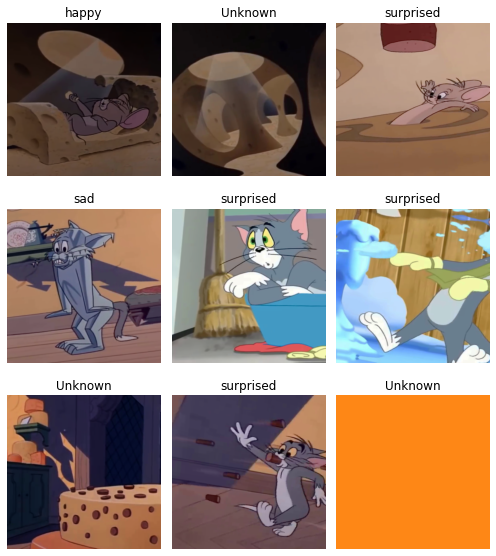

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


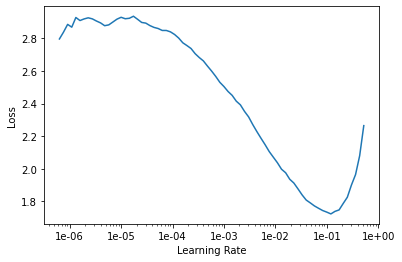

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1000, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,2.150205,8.304418,0.142857,00:18
1,1.702796,3.688375,0.285714,00:17
2,1.443861,2.382338,0.428571,00:16
3,1.261522,2.449304,0.500000,00:17
4,1.148249,1.724115,0.571429,00:17
5,1.033438,1.197961,0.714286,00:17
6,0.937867,1.144471,0.785714,00:17
7,0.867788,1.286928,0.714286,00:17
8,0.810017,1.577077,0.714286,00:17
9,0.747508,1.729573,0.642857,00:16


Buffered data was truncated after reaching the output size limit.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Test.csv")
df

In [ ]:
res=[]
for i in df["Frame_ID"]:
  
    path = '/content/drive/My Drive/Colab Notebooks/test/'+f"{i}" #The path of your test image
    img = open_image(get_image_files(path)[0])
    pred_class,pred_idx,outputs = learn.predict(img)
    res.append(str(pred_class))
    print ("It is a", pred_class)
    #img.show()
    #print ("It is a", pred_class)

In [ ]:
df['Emotion']=res
df.to_csv("/content/drive/My Drive/Colab Notebooks/test/Ans10.csv")